# Training Model

# Import Library

In [93]:
#import all realated libraries
#import libraries for data analysis
import numpy as np
import pandas as pd

# import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import pickle and json file for columns and model file
import pickle
import json
import joblib
import yaml
import scipy.stats as scs
import src.util as util
import yaml

# import warnings for ignore the warnings
import warnings 
warnings.filterwarnings("ignore")

# library for model selection and models
from sklearn.model_selection import train_test_split

# evaluation metrics for classification model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

import json
from datetime import datetime
from sklearn.metrics import classification_report
import uuid

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [94]:
params_dir = "config/config.yaml"

In [95]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [96]:
params = load_params(params_dir)

In [97]:
params

{'raw_dataset_dir': 'dataset/1 - raw data/',
 'train_set_path': ['dataset/2 - processed/X_train.pkl',
  'dataset/2 - processed/y_train.pkl'],
 'valid_set_path': ['dataset/2 - processed/X_valid.pkl',
  'dataset/2 - processed/y_valid.pkl'],
 'test_set_path': ['dataset/2 - processed/X_test.pkl',
  'dataset/2 - processed/y_test.pkl'],
 'train_bow_set_path': ['dataset/3 - final/X_train_bow.pkl',
  'dataset/3 - final/y_train_encoded.pkl'],
 'valid_bow_set_path': ['dataset/3 - final/X_valid_bow.pkl',
  'dataset/3 - final/y_valid_encoded.pkl'],
 'test_bow_set_path': ['dataset/3 - final/X_test_bow.pkl',
  'dataset/3 - final/y_test_encoded.pkl'],
 'train_tfidf_set_path': ['dataset/3 - final/X_train_tfidf.pkl',
  'dataset/3 - final/y_train_encoded.pkl'],
 'valid_tfidf_set_path': ['dataset/3 - final/X_valid_tfidf.pkl',
  'dataset/3 - final/y_valid_encoded.pkl'],
 'test_tfidf_set_path': ['dataset/3 - final/X_test_feng.pkl',
  'dataset/3 - final/X_test_tfidf.pkl'],
 'model_wordwvec': 'model/word2vec

In [98]:
config_data = util.load_config()

## Read Data

In [99]:
#Read data X_train dan y_sm hasil dari data preparation
X_train_clean = util.pickle_load(config_data["train_tfidf_set_path"][0])
y_train = util.pickle_load(config_data["train_tfidf_set_path"][1])

#Read data X_valid dan y_valid hasil dari data preparation
X_valid_clean = util.pickle_load(config_data["valid_tfidf_set_path"][0])
y_valid = util.pickle_load(config_data["valid_tfidf_set_path"][1])

#Read data X_test dan y_test hasil dari data preparation
X_test_clean = util.pickle_load(config_data["test_tfidf_set_path"][0])
y_test = util.pickle_load(config_data["test_tfidf_set_path"][1])

In [100]:
X_train_clean

<8052x20797 sparse matrix of type '<class 'numpy.float64'>'
	with 79263 stored elements in Compressed Sparse Row format>

In [101]:
y_train

array([2, 2, 2, ..., 4, 2, 2])

In [102]:
X_valid_clean

<1207x20797 sparse matrix of type '<class 'numpy.float64'>'
	with 9742 stored elements in Compressed Sparse Row format>

In [103]:
y_valid

array([5, 1, 2, ..., 2, 5, 5])

In [104]:
X_test_clean

<806x20797 sparse matrix of type '<class 'numpy.float64'>'
	with 6574 stored elements in Compressed Sparse Row format>

In [105]:
y_test

array([5, 1, 2, 2, 2, 5, 5, 2, 5, 2, 1, 3, 5, 1, 2, 2, 5, 2, 2, 5, 0, 5,
       2, 5, 5, 2, 4, 5, 3, 2, 5, 5, 1, 2, 4, 5, 4, 4, 5, 1, 4, 3, 5, 2,
       1, 2, 5, 2, 5, 2, 5, 3, 5, 5, 2, 2, 2, 3, 4, 2, 4, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 5, 2, 2, 5, 2, 4, 1, 2, 1, 2, 4, 0, 5, 2, 2, 4,
       5, 2, 5, 1, 5, 3, 5, 5, 2, 2, 2, 1, 5, 1, 2, 2, 5, 3, 4, 2, 5, 2,
       3, 5, 5, 4, 2, 1, 1, 2, 2, 1, 2, 2, 2, 4, 5, 2, 3, 2, 4, 5, 2, 1,
       2, 5, 1, 4, 2, 1, 5, 5, 0, 2, 2, 2, 1, 1, 1, 1, 3, 2, 2, 4, 5, 0,
       5, 4, 5, 2, 2, 0, 4, 2, 2, 1, 2, 2, 2, 4, 2, 2, 1, 4, 2, 2, 2, 2,
       5, 2, 1, 1, 5, 2, 2, 2, 3, 5, 2, 2, 3, 2, 4, 2, 4, 5, 2, 5, 0, 5,
       4, 2, 2, 1, 2, 5, 5, 2, 2, 2, 5, 2, 0, 5, 2, 3, 1, 2, 2, 5, 3, 1,
       2, 5, 2, 3, 2, 5, 4, 5, 1, 5, 2, 2, 3, 2, 2, 5, 2, 5, 2, 2, 4, 2,
       2, 5, 2, 1, 2, 4, 2, 2, 5, 4, 5, 2, 2, 1, 2, 5, 2, 1, 2, 2, 1, 4,
       4, 2, 5, 5, 3, 4, 5, 1, 2, 2, 1, 2, 2, 5, 2, 2, 2, 2, 2, 2, 5, 4,
       2, 2, 2, 0, 5, 2, 2, 4, 3, 5, 2, 5, 5, 4, 2,

## LogisticRegression

In [106]:
from sklearn.linear_model import LogisticRegression

def binary_classification_logistic_regression_tuned(x_train, y_train, x_valid, y_valid, x_test, y_test):
    # Set hyperparameters for Logistic Regression
    lr_params = {'C': 0.01, 'penalty': 'none', 'solver': 'saga'}
    
    # Instantiate the Logistic Regression classifier
    lr_classifier = LogisticRegression(**lr_params, random_state=123)
    
    lr_classifier.fit(x_train, y_train)
    
    # Evaluate on the validation set
    valid_pred = lr_classifier.predict(x_valid)
    report = classification_report(y_valid, valid_pred, output_dict=True)
    valid_recall = report['weighted avg']['recall']
    print('Validation recall:', valid_recall)
    
    # Evaluate on the test set
    test_pred = lr_classifier.predict(x_test)
    report = classification_report(y_test, test_pred, output_dict=True)
    test_recall = report['weighted avg']['recall']
    print('Test recall:', test_recall)
    
    return lr_classifier

In [107]:
lr_best = binary_classification_logistic_regression_tuned(x_train=X_train_clean, y_train=y_train,
                                                          x_valid=X_valid_clean, y_valid=y_valid,
                                                          x_test=X_test_clean, y_test=y_test)

Validation recall: 0.8500414250207126
Test recall: 0.8387096774193549


In [108]:
valid_pred = lr_best.predict(X_valid_clean)
test_pred = lr_best.predict(X_test_clean)
valid_acc = accuracy_score(y_valid, valid_pred)

In [109]:
valid_acc

0.8500414250207126

In [110]:
print(classification_report(y_valid, valid_pred))

              precision    recall  f1-score   support

           0       0.81      0.52      0.63        25
           1       0.94      0.91      0.92       147
           2       0.87      0.93      0.90       594
           3       0.67      0.60      0.64        68
           4       0.81      0.78      0.80       123
           5       0.82      0.76      0.79       250

    accuracy                           0.85      1207
   macro avg       0.82      0.75      0.78      1207
weighted avg       0.85      0.85      0.85      1207



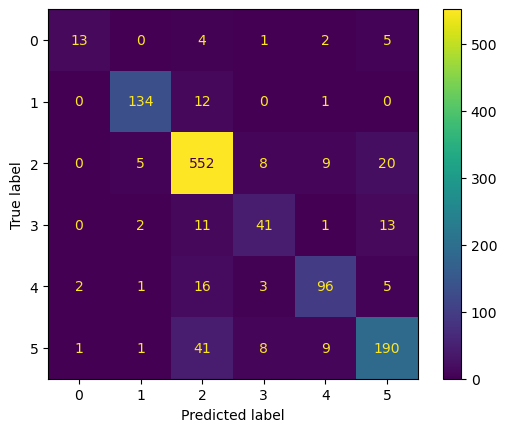

In [111]:
ConfusionMatrixDisplay.from_predictions(y_valid, valid_pred)
plt.show()

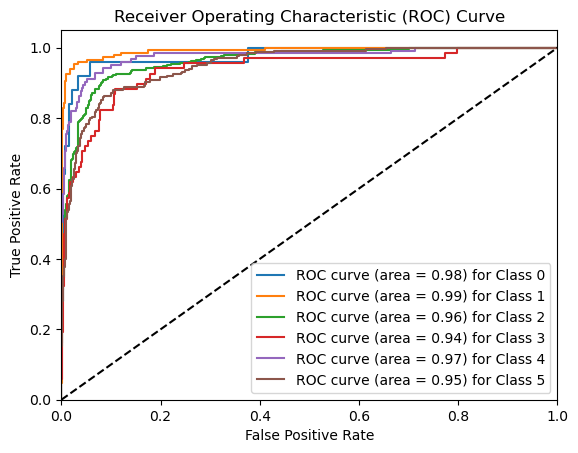

In [112]:
from sklearn.metrics import roc_curve, auc

# Hitung probabilitas prediksi untuk setiap kelas
probs = lr_best.predict_proba(X_valid_clean)  # Ganti dengan model yang sesuai

# Inisialisasi list untuk menyimpan nilai FPR, TPR, dan AUC untuk setiap kelas
fpr_list = []
tpr_list = []
roc_auc_list = []

# Loop melalui setiap kelas
for positive_class in range(6):  # Anda memiliki 6 kelas
    # Hitung probabilitas prediksi kelas positif terhadap kelas negatif
    fpr, tpr, thresholds = roc_curve(y_valid == positive_class, probs[:, positive_class])

    # Hitung AUC
    roc_auc = auc(fpr, tpr)
    
    # Tambahkan hasil ke dalam list
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)

    # Plot ROC curve untuk setiap kelas
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f}) for Class {positive_class}')

# Plot garis baseline
plt.plot([0, 1], [0, 1], 'k--')

# Pengaturan plot ROC
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [113]:
test_pred = lr_best.predict(X_test_clean)
test_acc = accuracy_score(y_test, test_pred)

In [114]:
test_acc

0.8387096774193549

In [115]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.82      0.56      0.67        16
           1       0.93      0.92      0.92        98
           2       0.87      0.92      0.90       396
           3       0.70      0.35      0.46        46
           4       0.74      0.78      0.76        83
           5       0.78      0.78      0.78       167

    accuracy                           0.84       806
   macro avg       0.81      0.72      0.75       806
weighted avg       0.83      0.84      0.83       806



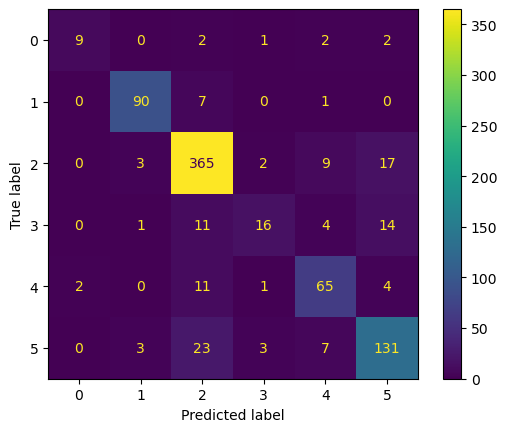

In [116]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred)
plt.show()

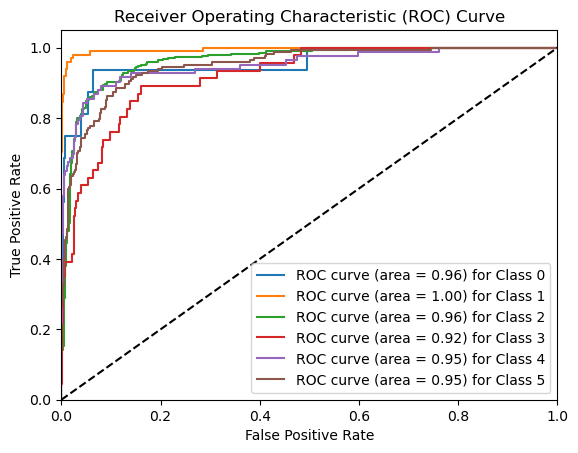

In [117]:
from sklearn.metrics import roc_curve, auc

# Hitung probabilitas prediksi untuk setiap kelas
probs = lr_best.predict_proba(X_test_clean)  # Ganti dengan model yang sesuai

# Inisialisasi list untuk menyimpan nilai FPR, TPR, dan AUC untuk setiap kelas
fpr_list = []
tpr_list = []
roc_auc_list = []

# Loop melalui setiap kelas
for positive_class in range(6):  # Anda memiliki 6 kelas
    # Hitung probabilitas prediksi kelas positif terhadap kelas negatif
    fpr, tpr, thresholds = roc_curve(y_test == positive_class, probs[:, positive_class])

    # Hitung AUC
    roc_auc = auc(fpr, tpr)
    
    # Tambahkan hasil ke dalam list
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)

    # Plot ROC curve untuk setiap kelas
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f}) for Class {positive_class}')

# Plot garis baseline
plt.plot([0, 1], [0, 1], 'k--')

# Pengaturan plot ROC
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Save Log Best Model

In [118]:
def save_model_log(model, model_name, X_test, y_test):
    # generate unique id
    model_uid = uuid.uuid4().hex
    
    # get current time and date
    now = datetime.now()
    training_time = now.strftime("%H:%M:%S")
    training_date = now.strftime("%Y-%m-%d")
    
    # generate classification report
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # create dictionary for log
    log = {"model_name": model_name,
           "model_uid": model_uid,
           "training_time": training_time,
           "training_date": training_date,
           "classification_report": report}
    
    # menyimpan log sebagai file JSON
    with open('training_log/training_log.json', 'w') as f:
        json.dump(log, f)

In [119]:
save_model_log(model = lr_best, model_name = "LR Best", X_test = X_test_clean, y_test=y_test)

## Evaluation Metrics

In [66]:
import pandas as pd
from sklearn.metrics import classification_report

# definisikan model-model yang ingin dibandingkan
models = {
          'LR_cv':lr_best
         }

# loop untuk menghitung dan menyimpan metrik untuk setiap model
results = {}
for name, model in models.items():
    # hitung prediksi pada data test
    y_pred = model.predict(X_test_clean)
    # hitung metrik
    report = classification_report(y_test, y_pred, output_dict=True)
    # simpan metrik ke dictionary
    results[name] = {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score'],
        'accuracy': report['accuracy'],
        'macro_avg_precision': report['macro avg']['precision'],
        'macro_avg_recall': report['macro avg']['recall'],
        'macro_avg_f1_score': report['macro avg']['f1-score'],
        'weighted_avg_precision': report['weighted avg']['precision'],
        'weighted_avg_recall': report['weighted avg']['recall'],
        'weighted_avg_f1_score': report['weighted avg']['f1-score']
    }

# buat dataframe dari dictionary
df_results = pd.DataFrame.from_dict(results, orient='index')

# tampilkan dataframe sebagai tabel
df_results

,precision,recall,f1_score,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1_score
LR_cv,0.83438,0.83871,0.832344,0.83871,0.805198,0.719662,0.74859,0.83438,0.83871,0.832344


# Save Model

## LogisticRegression

In [67]:
lr_best_cv = 'model/lr_best_cv.pkl'
with open(lr_best_cv, 'wb') as file:
    pickle.dump(lr_best, file)

## Cara Load Model

In [1]:
# Load model dari folder models
"""
filename = 'models/model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)
"""

"\nfilename = 'models/model.pkl'\nwith open(filename, 'rb') as file:\n    model = pickle.load(file)\n"